<a href="https://colab.research.google.com/github/bullock8/FiveThirtyEight_Riddler/blob/master/2020_05_22_Riddler_Classic_Mackerel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Riddler Classic (May 22, 2020)
This is the solution to the [FiveThirtyEight Riddler Classic](https://fivethirtyeight.com/features/somethings-fishy-in-the-state-of-the-riddler/) problem posted on May 22, 2020, solved by Darcy and John Bullock.  The problem involved finding all the "mackerel" words for each state.  A "mackerel" word is defined as a word that shares at least 1 character with the names for exactly 49 of the 50 states.



#Methodology

The provided word list for the problem was 263533 words long.  We wanted to see if there is a way of solving the problem that does not get too heavily involved in regexes or other string search methods that might not be super fast to run.

##Converting Words to Bit Arrays

  To solve this problem, we wanted to see if we could do something with bit math to see if that sped up the search through the list.  Even if this method is not as efficient as I think it will be, it is still a fun way to think about the problem.

For the problem, we converted each word and state name into a 26-bit array, with one bit for each letter of the alphabet.  *If a state name or word contained any number of "a" characters, then the first bit of the array would be a "1".  Else, the first bit of the array would be "0"*, and so on for the rest of the alphabet.  This method is demonstrated for the words "**Indiana**" and "**brothers**" below.  (**Sidenote:  "brothers" was found to be a "mackerel" word for the state of Indiana**)

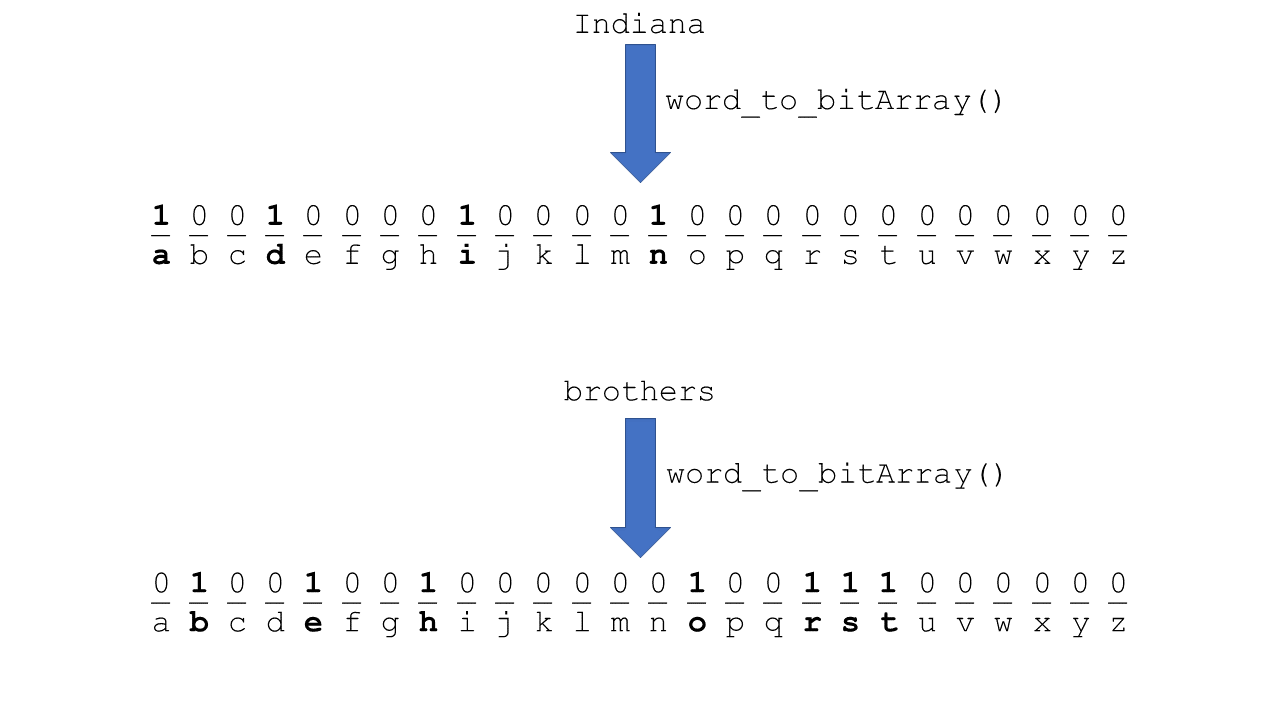

##Testing for Shared Letters in Words

Then, we needed to test for a pair of words to see if they shared any of the same letters.  Once we have the bit arrays for all the words, we can do that by just using a bitwise AND operator.  If the two words in question don't share any letters, then the result of the bitwise AND will just be an array of zeros.  This is demonstrated with "Indiana" and "brothers", which don't share any letters.

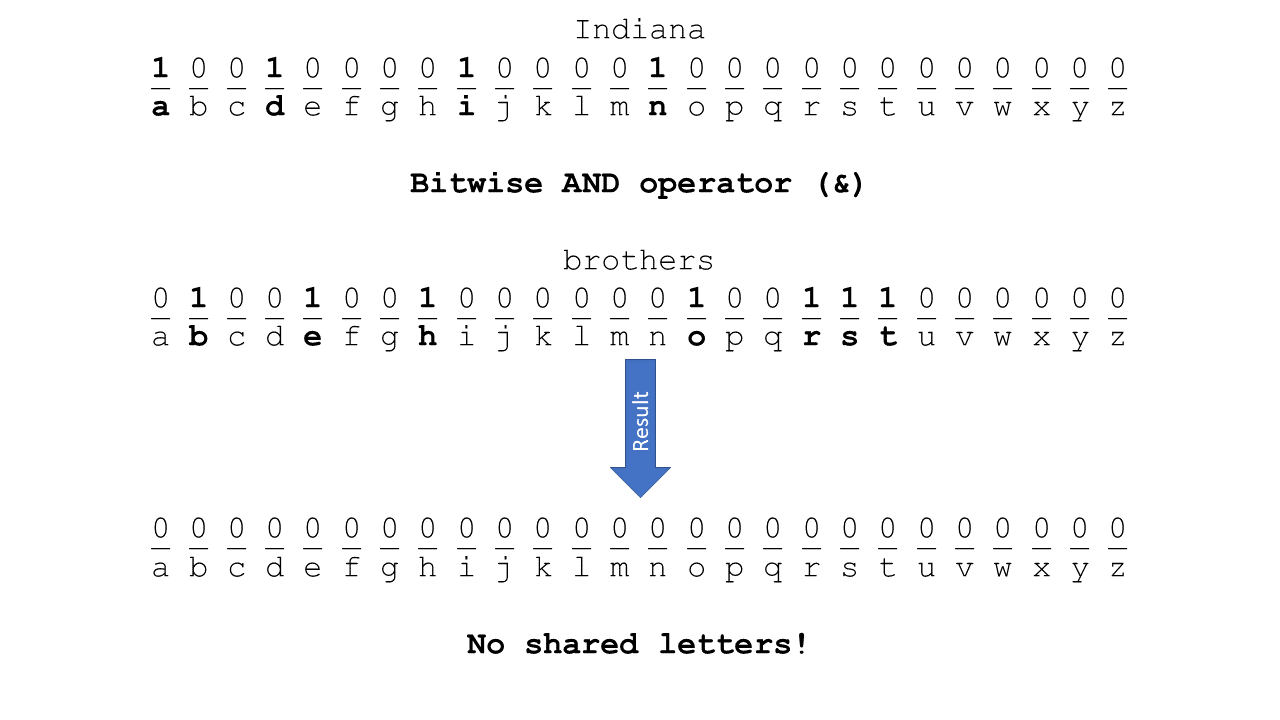

Now, let's consider two words that do share letters, "Texas" and "brothers".  Using the bitwise AND operator on the bit array representations of these words will yield a bit array with "1" values at the letters that the two words share.  In this example, "Texas" and "brothers" share the letters "e", "s", and "t" as shown in the resulting bit array below.

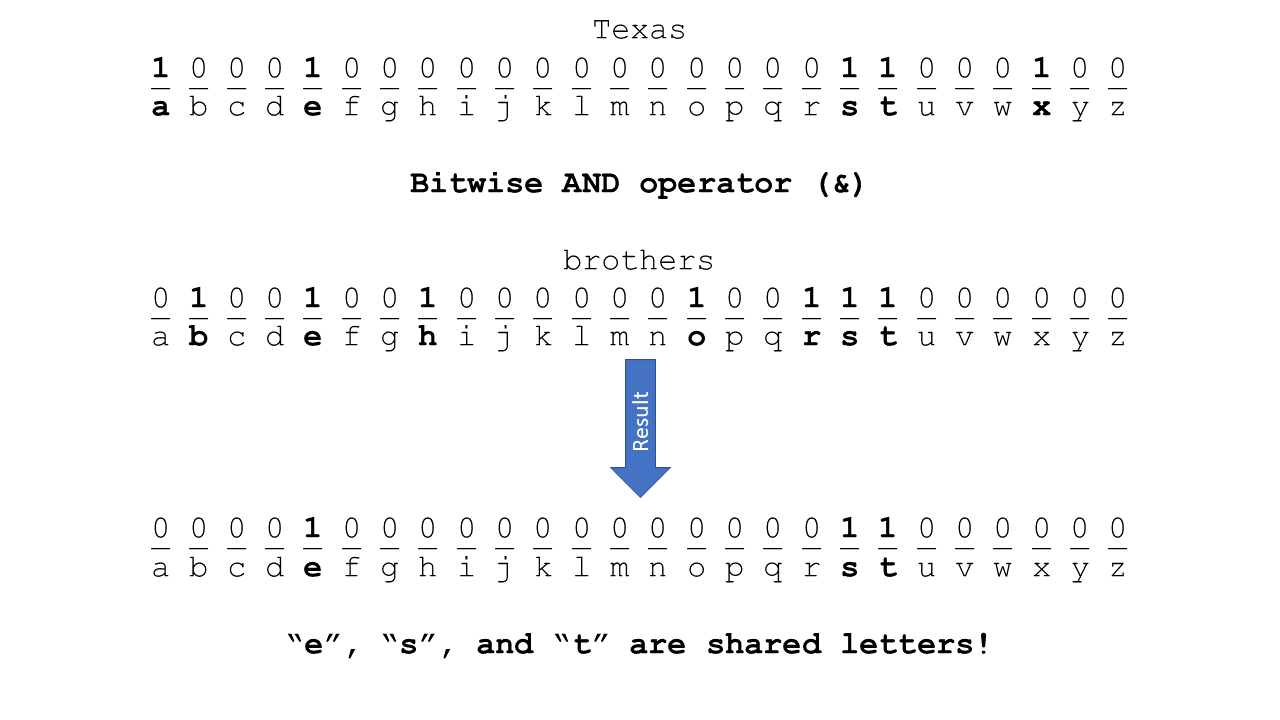

We now have a method for checking if words share any amount of letters using the bit array representations of the words.  We will use this bit array methodology to check if a state name and a word share any letters while hunting for "mackerel" words.

#Puzzle Solution
The section below will contain the work done to find the answers to the longest "mackerel" word(s) in the word list.

##Downloading Word List and `bitarray` Library

First, we just had to download the provided word list.  This is commented out to avoid re-downloading the data as I keep on running/debugging the notebook.

In [0]:
!wget https://norvig.com/ngrams/word.list

--2020-05-25 02:54:27--  https://norvig.com/ngrams/word.list
Resolving norvig.com (norvig.com)... 158.106.138.13
Connecting to norvig.com (norvig.com)|158.106.138.13|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2715764 (2.6M) [text/plain]
Saving to: ‘word.list’

word.list           100%[===================>]   2.59M  2.47MB/s    in 1.0s    

2020-05-25 02:54:28 (2.47 MB/s) - ‘word.list’ saved [2715764/2715764]



To do the bit math for the problem, we're going to install/use the `bitarray` library.

In [0]:
pip install bitarray

     |████████████████████████████████| 51kB 3.7MB/s 
  Created wheel for bitarray: filename=bitarray-1.2.2-cp36-cp36m-linux_x86_64.whl size=105094 sha256=0a6228a8c0d867a3899718e7e3cb3f3a69ebf0473cff196f74372822281f4fd5
  Stored in directory: /root/.cache/pip/wheels/57/7b/51/0f1c269e1532ef20db3a048b53744690a63e972876d438b496
Successfully built bitarray


##Word to Bit Array Conversion

This next block of code defines a function, `word_to_bitArray`, that converts a word into the bit array previously discussed in the Methodology section.

Additionally, the zero bit array was also defined in this section of code.  This was used for the comparison test to see if two words shared any letters, again discussed in the Methodology section.


In [0]:
from bitarray import bitarray

alphabet = "abcdefghijklmnopqrstuvwxyz"
zero_bitarray = bitarray([False] * 26)

def word_to_bitArray(word):
  contains_letter = []
  for character in alphabet:
    contains_letter.append(character in word)

  equivalent_bitArray = bitarray(contains_letter)
  return equivalent_bitArray

Now, we're going to read the imported word list.  We're going to save each word in the `word_list` array and the corresponding bit array representation of each word in `word_bitarrays`.

In [0]:
words_path = "/content/word.list"

# Iterate through the lines

word_bitarrays = []
word_list = []

with open(words_path,"r") as word_file:
        for line in word_file:
          clean_line = line.strip()
          word_list.append(clean_line)
          word_bitarrays.append(word_to_bitArray(clean_line))

This section of code now creates an array of the state names, and an array of the corresponding bit array representations for each state.

In [0]:
states = ["Alabama", "Alaska", "Arizona", "Arkansas", "California", "Colorado", "Connecticut",
"Delaware", "Florida", "Georgia", "Hawaii", "Idaho", "Illinois", "Indiana", "Iowa",
"Kansas", "Kentucky", "Louisiana", "Maine", "Maryland", "Massachusetts", "Michigan",
"Minnesota", "Mississippi", "Missouri", "Montana", "Nebraska", "Nevada",
"New Hampshire", "New Jersey", "New Mexico", "New York", "North Carolina",
"North Dakota", "Ohio", "Oklahoma", "Oregon", "Pennsylvania", "Rhode Island",
"South Carolina", "South Dakota", "Tennessee", "Texas", "Utah", "Vermont",
"Virginia", "Washington", "West Virginia", "Wisconsin", "Wyoming"]

states_bitarray = []
for state in states:
  states_bitarray.append(word_to_bitArray(state.lower()))

##Finding a "Mackerel"

Now, we'll make a function `state_contains_char` that will take the array indices of a state and a word as arguments.  The function then finds the bit array representations of the state and word at their respective indices.

Using the logic discussed in the Methodology section:

*   If the word and the state share at least one character, then using the logical `&` operator on the state and word bit arrays will yield some bit array that is not all logical `False`, which is represented as a bit array of zeros.
*   The function will return `True` if the state name and the word at the inputted indices share at least one character, and `False` if there are no shared characters.

In [0]:
def state_contains_char(state_index, word_index):
  return (word_bitarrays[word_index] & states_bitarray[state_index]) != zero_bitarray

Next, a method named `state_mackerel` will be constructed, operating in the following manner.  This function will take two arguments for the input, the index of a state in the array of states and the index of a word in the word array.


*   If the state and the word at `state_index` and `word_index` share any letters, then the word is not a "mackerel" for the state, and the function returns `False`.
*   Otherwise, the function will go on to check that all other state names share at least one letter with the word at `word_index`.  
  * If any state names do not share a letter with the word at `word_index`, then the function returns `False`.
  * If all other state names share at least one letter with the word at `word_index`, then this word is a "mackerel" for the state at `state_index` and the function returns `True`.

In [0]:
def state_mackerel(state_index, word_index):
  if state_contains_char(state_index, word_index):
    return False
  else:
    other_state_indices = list(range(0, 50))
    other_state_indices.remove(state_index)
    for state in other_state_indices:
      if (state_contains_char(state, word_index) != True):
        return False
    return True

##Finding all the "Mackerels"

We'll now do a state-by-state search for all the mackerel words.

For each state, we will iterate through the whole `word_list` array to search for "mackerels".  If a word is found to be a "mackerel" according to the `state_mackerel` method, the word is pushed to an array of words that are "mackerels" for the given state.

At the end of the word list iteration for each state, the list of "mackerel" words for the state is pushed to the `all_mackerel_words` array, which will be a two-dimensional array that stores all "mackerel" words for each of the 50 states.

Additionally, the count of total "mackerel" words for each state is recorded and pushed to the `mackerel_count` array.

In [0]:
mackerel_count = []
all_mackerel_words = []

for state_ind in range(0, 50):
  count = 0
  state_mack_words = []
  for word_ind in range(0, len(word_bitarrays)):
    if state_mackerel(state_ind, word_ind):
      count += 1
      state_mack_words.append(word_list[word_ind])
    
  mackerel_count.append(count)
  all_mackerel_words.append(state_mack_words)

##Finding the Largest "Mackerel" Word(s)

Now, we're going to search for the largest "mackerel" word(s) that each state has, which will be pushed to the `largest_word` array.  Another array `max_word_length` was used to store the length (in characters) of the largest "mackerel" word of each state.

In [0]:
largest_word = []
max_word_length = []

for state in range(0, len(all_mackerel_words)):
  max_len = 0              # Default value for state with no mackerel words
  max_word = ["N/A"]       # Default value for state with no mackerel words
  for word in range(0, len(all_mackerel_words[state])):
    if len(all_mackerel_words[state][word]) > max_len:
      max_len = len(all_mackerel_words[state][word])
      max_word = [all_mackerel_words[state][word]]
    elif len(all_mackerel_words[state][word]) == max_len:
      max_word.append(all_mackerel_words[state][word])
    
  largest_word.append(max_word)
  max_word_length.append(max_len)

We now have found the largest "mackerel" word for each state, but now we need to find the largest overall "mackerel" for all states.

From the code below, it was found out that there was a tie for the longest "mackerel" at 23 characters long.


*   **counterproductivenesses** from Alabama
*   **hydrochlorofluorocarbon** from Mississippi



In [0]:
largest_word_length = max(max_word_length)

print("The largest \"mackerel\" words are:")
for state_ind in range(0, len(max_word_length)):
  if max_word_length[state_ind] == largest_word_length:
    for large_word in largest_word[state_ind]:
      print(f"\t{large_word} from {states[state_ind]}")

The largest "mackerel" words are:
	counterproductivenesses from Alabama
	hydrochlorofluorocarbon from Mississippi


#Extra Credit

This section will contain the solution and the code used to find the state with the most "mackerel" words.

To summarize, **Ohio had the most "mackerel" words with 11,342 words**.

##Bar Graph of "Mackerels" by State

Now, we'll create a bar graph of the number of "mackerel" words for each state.  Amongst the states, there is a very large gap between the number of mackerel words that a state might have.  For example, Michigan has 4 "mackerel" words and Ohio has 11,342 "mackerel" words.


Because of this wide range of number of "mackerels" for each state, the bar graph is plotted on with a logarithmic y-scale instead of a linear scale to better display the range of "mackerel" words between states.

In [0]:
import plotly.graph_objects as go

fig = go.Figure([go.Bar(x=states, y=mackerel_count, text = mackerel_count)])
fig.update_layout(
    title={
        'text': "Number of \"Mackerel\" Words for Each State",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'}, 
        xaxis_title="State", 
        yaxis_title="Number of Mackerels", 
        yaxis_type="log")
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.show()


##Table of "Mackerels" by State

If a table of the "mackerel" words for each state is preferred, then below shows the same data as in the bar graph, but in tabular form.

Additionally, the table also contains the largest "mackerel" word for each state.  For states that don't have mackerel words, "N/A" is printed.  For states with multiple "mackerel" words that are equally large, the largest "mackerel" word that is first alphabetically is displayed.

In [0]:
import pandas as pd

def prettify_largest_word(word_array):
  pretty_word_array = []
  for large_words in word_array:
    pretty_word_string = ""
    for word_index in range(0, len(large_words)):
      if word_index == 0:
        pretty_word_string = large_words[word_index]
      else:
        pretty_word_string = pretty_word_string + ", " + large_words[word_index]
    
    pretty_word_array.append(pretty_word_string)
  
  return pretty_word_array

pretty_large_words = prettify_largest_word(largest_word)

d = {'col1': states, 'col2': mackerel_count, 'col3': pretty_large_words, 'col4':max_word_length}
df = pd.DataFrame(data=d)
df.columns = ["State", "Mackerel Count", "Largest Word(s)", "Size of Largest Word(s)"]
pd.set_option('display.max_colwidth', 0)
df.sort_values(by=['Mackerel Count'], inplace=True, ascending=False)

from IPython.display import display, HTML
display(df)

,State,Mackerel Count,Largest Word(s),Size of Largest Word(s)
34,Ohio,11342,"transcendentalnesses, untranslatablenesses",20
0,Alabama,8274,counterproductivenesses,23
43,Utah,6619,"expressionlessnesses, incompressiblenesses",20
23,Mississippi,4863,hydrochlorofluorocarbon,23
10,Hawaii,1763,overscrupulousnesses,20
16,Kentucky,1580,"ambassadorships, probabiliorisms",15
49,Wyoming,1364,kaffeeklatsches,15
41,Tennessee,1339,"biobibliographical, micromorphological",18
1,Alaska,1261,microreproduction,17
27,Nevada,1229,psychophysiologists,19
